**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 65s 0us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

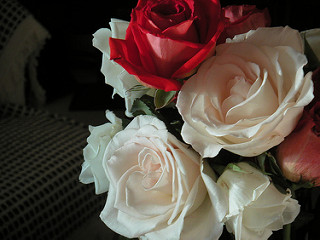

In [8]:
PIL.Image.open(str(roses[1]))

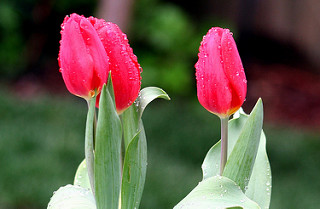

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

#Train test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Preprocessing

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

#Build convolutional neural network and train it

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - accuracy: 0.3140 - loss: 1.7604
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.5641 - loss: 1.0985
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.6733 - loss: 0.8842
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.7680 - loss: 0.6545
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.8494 - loss: 0.4561
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.9099 - loss: 0.2846
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.9641 - loss: 0.1360
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.9814 - loss: 0.0743
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - accuracy: 0.9852 - loss: 0.0554
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.9973 - loss: 0.0247
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.9978 - loss: 0.0125
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6315 - loss: 2.5810


[2.554001808166504, 0.6405228972434998]

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


array([[  6.199926 ,  23.150087 ,   4.4211826, -20.386127 ,  -3.016062 ],
       [ 13.455633 ,   0.6695701,  -7.83711  ,  -7.8678036,   5.2167897],
       [ -4.412718 ,  -2.1478202,  16.422932 , -14.44711  ,  -1.8169694],
       ...,
       [ -6.520346 ,  -4.4273057, -13.135468 ,  10.869881 ,   7.804851 ],
       [ -7.890915 ,  -3.1578767,   7.172247 ,   6.5103292,  -5.203772 ],
       [ -4.6388392, -18.41506  ,  -3.9515526,   6.4940205,   2.5278285]],
      dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

In [27]:
scores = []
for pred in predictions:
    score = tf.nn.softmax(pred)
    scores.append(np.argmax(score))

# convert the list of tensors to a numpy array
scores_array = tf.stack(scores).numpy()
scores_array[:5]

array([1, 0, 2, 4, 2])

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=scores_array)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 89,  12,  20,  10,  45],
       [  6,  93,  36,   8,  11],
       [  7,  18, 171,  18,  12],
       [  3,  13,  16, 106,  12],
       [ 30,  14,  17,  22, 129]])>

Text(70.72222222222221, 0.5, 'Truth')

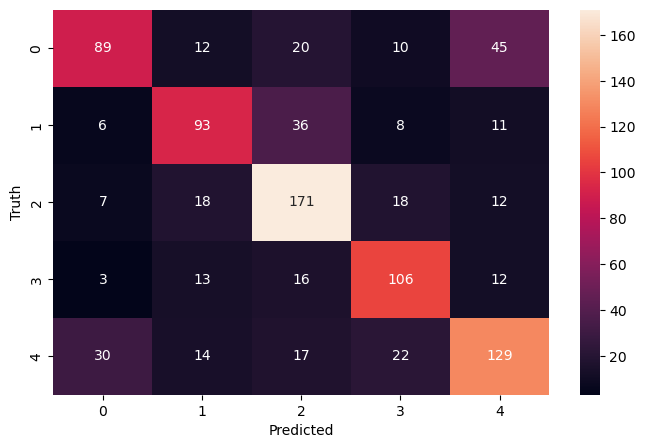

In [29]:
import seaborn as sn
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

C:\Users\Asus\AppData\Local\Temp\ipykernel_28980\3419723509.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sn.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Asus\AppData\Local\Temp\ipykernel_28980\3419723509.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distpl

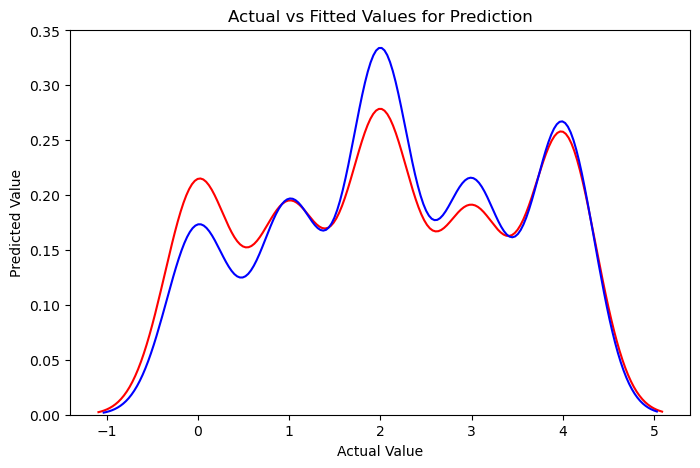

In [30]:
plt.figure(figsize=(8, 5))


ax1 = sn.distplot(y_test, hist=False, color="r", label="Actual Value")
sn.distplot(scores_array, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Prediction')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

plt.show()
plt.close()

Improve Test Accuracy Using Data Augmentation

In [31]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip(mode='HORIZONTAL_AND_VERTICAL'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

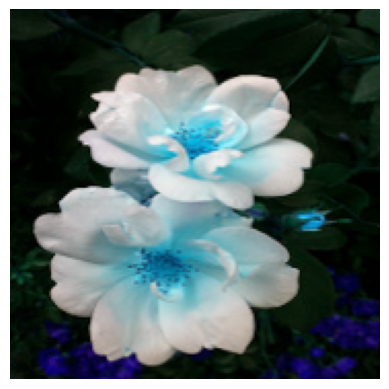

In [33]:
plt.axis('off')
plt.imshow(X[0])

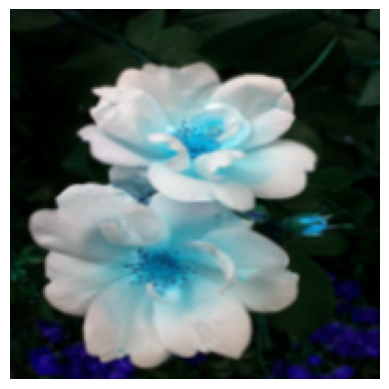

In [34]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer

In [35]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.3256 - loss: 1.5978
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.5430 - loss: 1.1088
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.6202 - loss: 0.9729
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.6462 - loss: 0.9018
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.6503 - loss: 0.8462
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.6873 - loss: 0.8023
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.7069 - loss: 0.7411
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.7273 - loss: 0.7113
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.7440 - loss: 0.6724
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.7701 - loss: 0.6105
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.7800 - loss: 0.5833
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15

In [36]:
model.evaluate(X_test_scaled,y_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7236 - loss: 1.1415


[1.1725841760635376, 0.7254902124404907]

In [37]:
predictions = model.predict(X_test_scaled)
predictions
scores = []
for pred in predictions:
    score = tf.nn.softmax(pred)
    scores.append(np.argmax(score))

# convert the list of tensors to a numpy array
scores_array = tf.stack(scores).numpy()
scores_array[:5]

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


array([1, 0, 2, 4, 2])

In [38]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=scores_array)
cm

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[102,  13,   9,   9,  43],
       [  4, 120,   5,   8,  17],
       [  5,  16, 168,  23,  14],
       [  1,   4,   6, 131,   8],
       [ 26,  18,   7,  16, 145]])>

Text(70.72222222222221, 0.5, 'Truth')

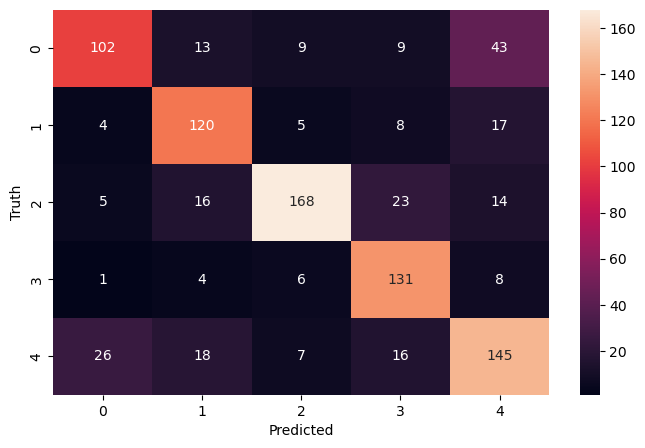

In [39]:
plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

C:\Users\Asus\AppData\Local\Temp\ipykernel_28980\4258785911.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sn.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Asus\AppData\Local\Temp\ipykernel_28980\4258785911.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distpl

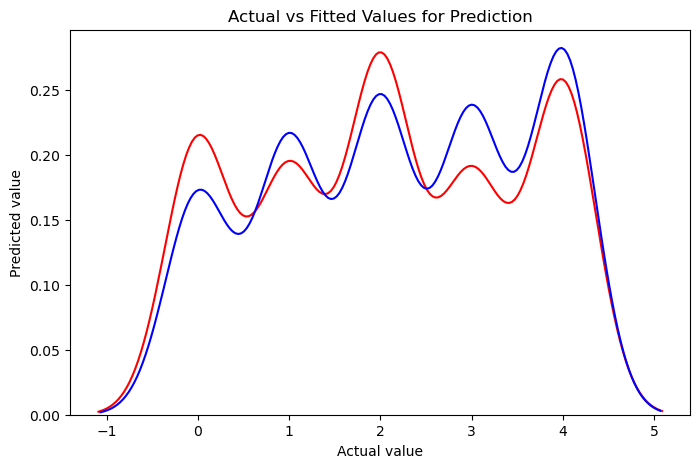

In [40]:
plt.figure(figsize=(8, 5))


ax1 = sn.distplot(y_test, hist=False, color="r", label="Actual Value")
sn.distplot(scores_array, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Prediction')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

plt.show()
plt.close()

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**